# Predicting median house value

## Load

In [1]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (12, 8)

In [3]:
ca_housing = datasets.fetch_california_housing(as_frame=True)
df = ca_housing['frame']

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Clean

<Axes: xlabel='HouseAge', ylabel='Count'>

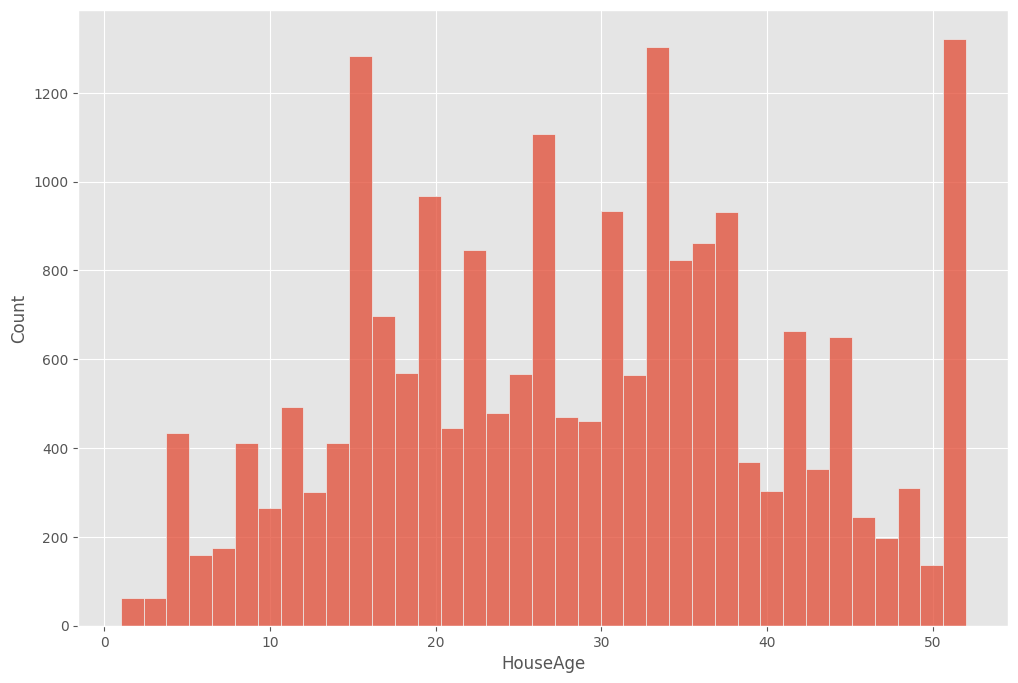

In [5]:
sns.histplot(df.HouseAge)

In [6]:
# let's say we're only interested in newer homes, so we define this filtering
# rule
df = df[df.HouseAge <= 30]

<Axes: xlabel='AveBedrms', ylabel='Count'>

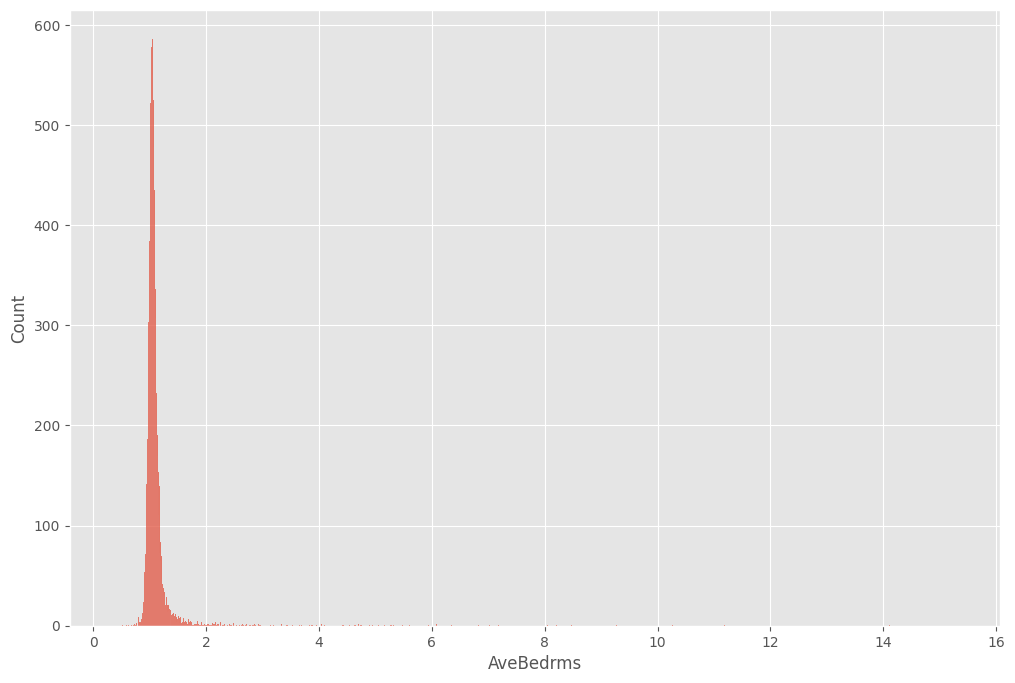

In [7]:
sns.histplot(x=df.AveBedrms)

<Axes: xlabel='AveBedrms'>

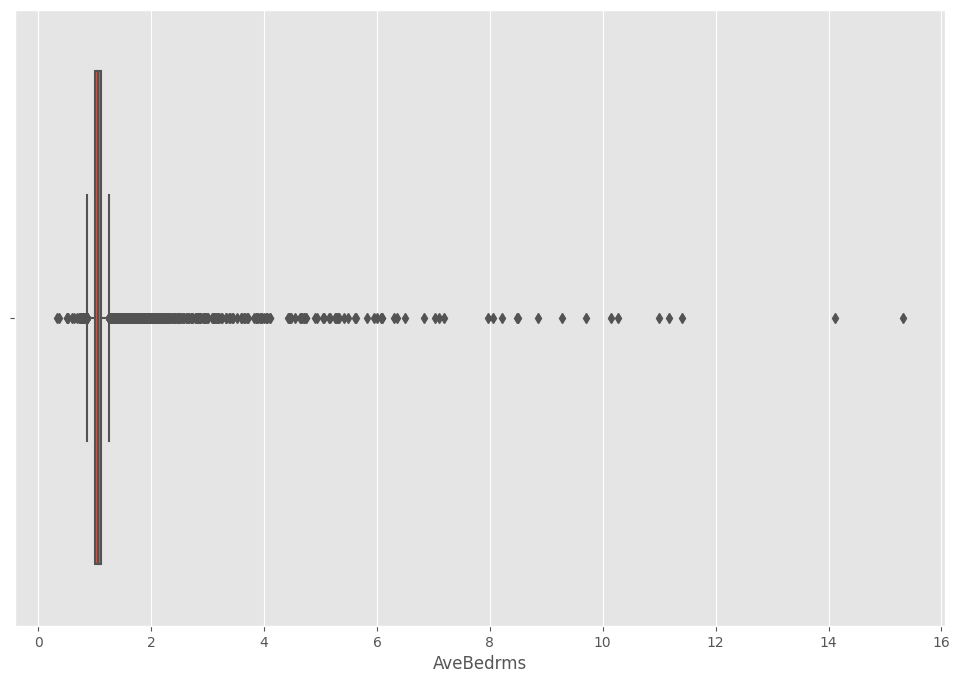

In [8]:
sns.boxplot(x=df.AveBedrms)

In [9]:
# let's also remove big houses
df = df[df.AveBedrms <= 4]

<Axes: xlabel='MedHouseVal', ylabel='Count'>

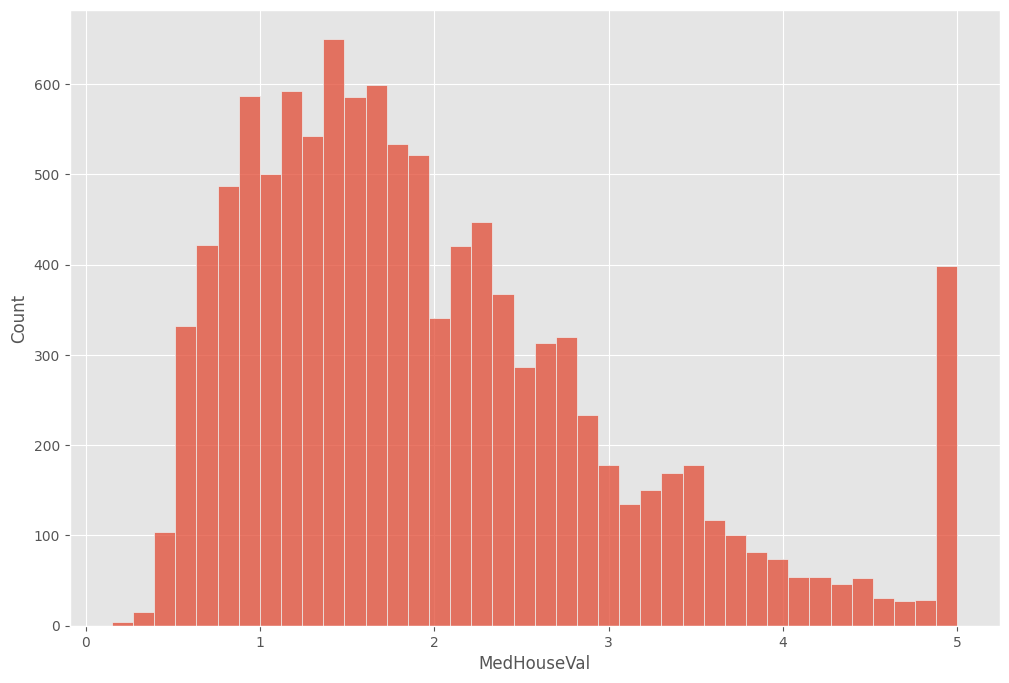

In [10]:
# distribution of our target variable
sns.histplot(df.MedHouseVal)

## Train test split

In [11]:
from sklearn.model_selection import train_test_split  # noqa

In [12]:
X = df.drop('MedHouseVal', axis='columns')
y = df.MedHouseVal

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

## Linear regression

In [14]:
from sklearn.linear_model import LinearRegression  # noqa

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_test)

<Axes: xlabel='MedHouseVal'>

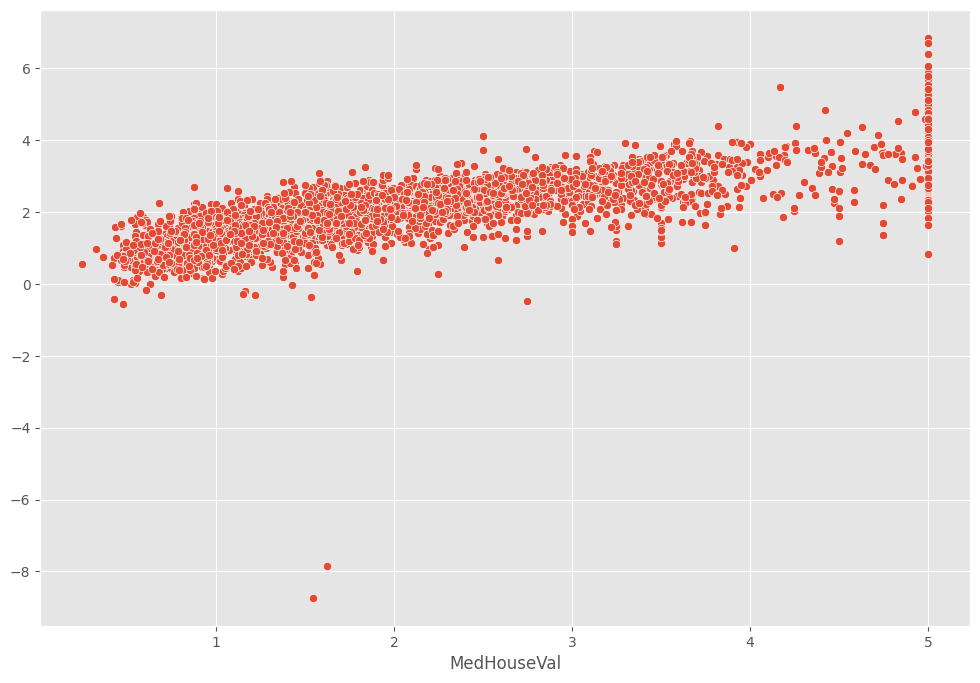

In [18]:
sns.scatterplot(x=y_test, y=y_pred)

## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor  # noqa

<Axes: xlabel='MedHouseVal'>

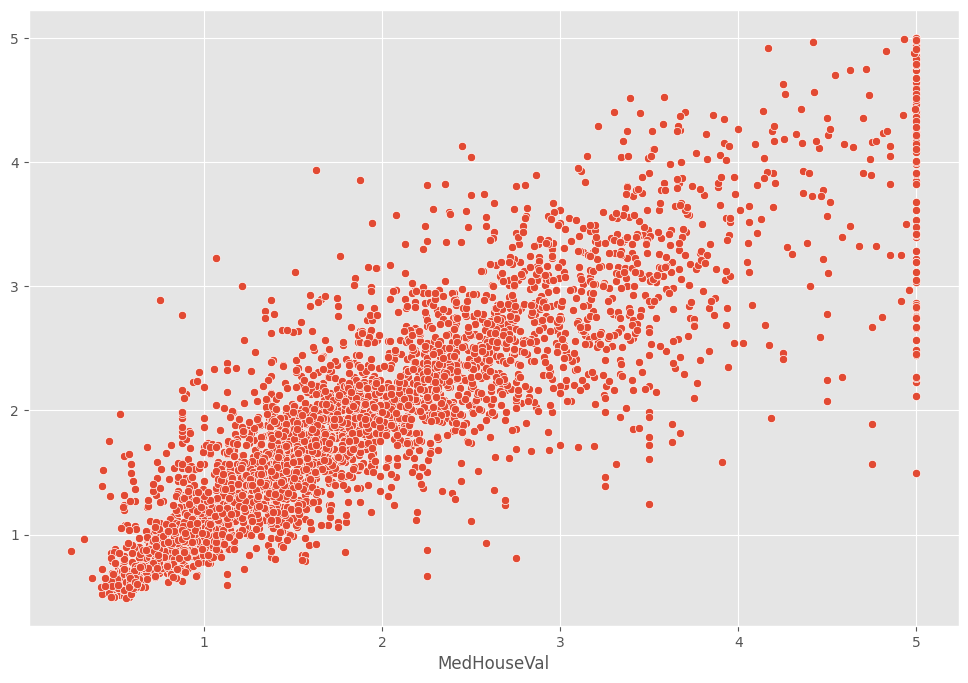

In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred)